<a href="https://colab.research.google.com/github/dvschultz/ml-art-colabs/blob/master/crepe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install crepe

     |████████████████████████████████| 368kB 10.2MB/s 
  Created wheel for crepe: filename=crepe-0.0.11-cp36-none-any.whl size=134848476 sha256=7cf88957e671d6031a4c0a86bb85241bc01ec9c006209601b250cea8de1a770e
  Stored in directory: /root/.cache/pip/wheels/7f/68/d0/502d27bfe590bfa51c6fe95cf9e4482fed18c22c480a8d7c77
Successfully built crepe


In [ ]:
!crepe --help

usage: /usr/local/bin/crepe [-h] [--output OUTPUT]
                            [--model-capacity {tiny,small,medium,large,full}]
                            [--viterbi] [--save-activation] [--save-plot]
                            [--plot-voicing] [--no-centering]
                            [--step-size STEP_SIZE] [--quiet]
                            filename [filename ...]

    This is a script for running the pre-trained pitch estimation model, CREPE,
    by taking WAV files(s) as input. For each input WAV, a CSV file containing:

        time, frequency, confidence
        0.00, 424.24, 0.42
        0.01, 422.42, 0.84
        ...

    is created as the output, where the first column is a timestamp in seconds,
    the second column is the estimated frequency in Hz, and the third column is
    a value between 0 and 1 indicating the model's voicing confidence (i.e.
    confidence in the presence of a pitch for every frame).

    The script can also optionally save the output activati

In [ ]:
!crepe /content/test.wav --step-size 40 -n -p -c full

CREPE: Processing /content/test.wav ... (1/1)
2020-07-26 03:48:33.756579: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-26 03:48:35.250445: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-26 03:48:35.293671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-26 03:48:35.294299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-07-26 03:48:35.294340: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-26 03

In [ ]:

import crepe
from scipy.io import wavfile

sr, audio = wavfile.read('/content/test.wav')
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=False,step_size=40)

11/11 [==============================] - 0s 18ms/step


In [ ]:
def mapped(x):
  return (x-minf)/(maxf-minf)

minf = min(frequency)
maxf = max(frequency)
print(minf,maxf)

for t in np.arange(len(time)):
  print(mapped(frequency[t]))


86.9345753117266 349.28126083128717
0.0020719641928486627
0.0029697725642452645
0.0024318747473070835
0.001994679407739702
0.0014357612537726028
0.001113461189188206
0.0008588938163182323
0.00038686667064808587
0.0015131807956837284
0.0017117820196254287
0.0005491126374959172
0.0010022964065641235
0.0008078868456950146
0.0006758547552971749
0.0
0.011294345510130407
0.06069778297570742
0.08520634943048325
0.13272854815579643
0.17127668249427846
0.17099821533587986
0.168808064405127
0.17063060893793314
0.1702905101133825
0.16866112240638725
0.16888576944348133
0.16852328029335784
0.16922721603426838
0.16836529757780924
0.1685035162319543
0.16935881085723098
0.16707808388598652
0.16642024425936058
0.16748768322625945
0.2222588861215929
0.305746757064963
0.36530073589902046
0.4639679916753748
0.5715608465252473
0.6666493702385571
0.6676619194093014
0.6754021659842987
0.6668618414999794
0.7869349292429376
0.6737749420896303
0.6738199441810614
0.6708088016947854
0.675190235446035
0.674703848

In [ ]:
import numpy as np
for t in np.arange(len(time)):
  print(time[t], frequency[t], confidence[t])

import csv

0.0 87.47814825023566 0.54065615
0.04 87.71368530070328 0.7587832
0.08 87.57256959128134 0.61669165
0.12 87.45787284302124 0.4722539
0.16 87.31124251785126 0.6564506
0.2 87.2266881641648 0.8302289
0.24 87.15990325765094 0.8717787
0.28 87.03606850050912 0.6928195
0.32 87.33155327806608 0.6651772
0.36 87.38365565090731 0.44643447
0.4 87.07863319215056 0.541597
0.44 87.19752445189687 0.7361014
0.48 87.14652174796954 0.79183036
0.52 87.11188356667145 0.68613774
0.56 86.9345753117266 0.7872192
0.6 89.89760942142205 0.71222466
0.64 102.85843749378905 0.27954984
0.68 109.28817867003538 0.40730724
0.72 121.75546999422318 0.27395466
0.76 131.8684452708867 0.4999798
0.8 131.79539033485477 0.5513608
0.84 131.22081149738418 0.65415215
0.88 131.69895001477767 0.66617453
0.92 131.6097262154077 0.7590522
0.96 131.1822617510512 0.77174896
1.0 131.2411971566446 0.708547
1.04 131.1460993295729 0.6865392
1.08 131.33077453801954 0.7804382
1.12 131.10465308777935 0.72965413
1.16 131.14091429357129 0.780073

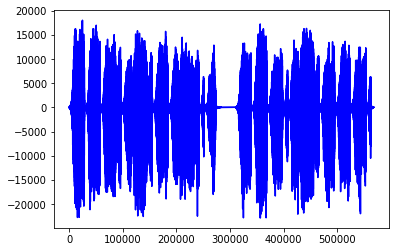

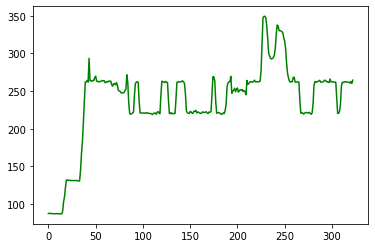

In [ ]:
import matplotlib.pyplot as plt

plt.plot(audio,'b')
plt.show()
plt.plot(frequency,'g')
plt.show()